In [1]:
from grenmlin import simulator, grn
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import visualize, get_input_signals, test_inputs

## 2:1 DEMUX
Testing elementary components that have multiple outputs. Formula:
$$
Y_1 = X_1 \cdot \overline S_1, Y_2 = X_1 \cdot S_1
$$

In [2]:
my_grn = grn.grn()
# 6 input species
my_grn.add_input_species("X1")
my_grn.add_input_species("S1")

# 2 output species
my_grn.add_species("DEMUX1", 0.1)
my_grn.add_species("DEMUX2", 0.1)

In [3]:
# X1 AND NOT S1
regulators = [{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2},
              {'name': 'S1', 'type': -1, 'Kd': 5, 'n': 3}]
products = [{'name': 'DEMUX1'}]
my_grn.add_gene(10, regulators, products)

# X1 AND S1
regulators = [{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2},
              {'name': 'S1', 'type': 1, 'Kd': 5, 'n': 3}]
products = [{'name': 'DEMUX2'}]
my_grn.add_gene(10, regulators, products)

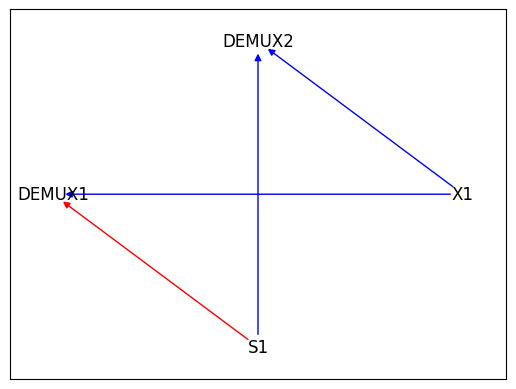

In [4]:
my_grn.plot_network()

In [5]:
inputs = get_input_signals(2, 100)
T, Y = simulator.simulate_sequence(my_grn, inputs, t_single = 250, plot_on=False, model="models/1_2_demux_model")

/home/anzearhar/dev/faks/npmp/UC_HW2_GRNM/helper_functions.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


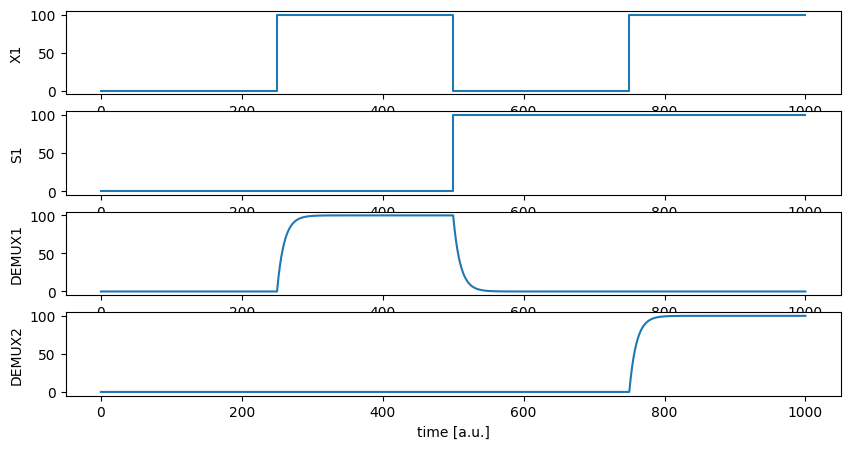

In [6]:
visualize(T, Y, my_grn)